In [1]:
from __future__ import division
import math
import matplotlib.pyplot as plt

import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import time

import warnings
warnings.filterwarnings('ignore')

# Load data from Drive

In [2]:
#Data set csv files
dataPin4 = pd.read_csv('DB/pins-Real-4.csv')
dataPin6 = pd.read_csv('DB/pins-Real-6.csv')
dataPin8 = pd.read_csv('DB/pins-Real-8.csv')
dataPin4Impostor = pd.read_csv('DB/pins-Impostor-4.csv')
dataPin6Impostor  = pd.read_csv('DB/pins-Impostor-6.csv')
dataPin8Impostor  = pd.read_csv('DB/pins-Impostor-8.csv')

In [3]:
listUsers = [1,2,3,4,7,8,11,12,15,16,17,19,20,22,24,25,27,28,33,34,36,37,39,41,42,43]

In [9]:
lengthDataSet = dataPin4['length']
lengthDataSet = lengthDataSet[0]
lengthDataSet

'pin-length-4'

In [4]:
dataPin4Impostor

,timeBetweenDown,timeBetweenUp,timeLapsePress,x,y,timeBetweenTouch,timeBetweenDown.1,timeBetweenUp.1,timeLapsePress.1,x.1,...,x.2,y.2,timeBetweenTouch.2,timeBetweenDown.3,timeBetweenUp.3,timeLapsePress.3,x.3,y.3,user,length
0,274091077,274091131,54,90.0,111.0,356,274091487,274091531,44,125.0,...,77.0,116.0,161,274092343,274092431,88,86.0,75.0,1,pin-length-4
1,274100552,274100633,81,110.0,86.0,243,274100876,274100933,57,96.0,...,102.0,76.0,159,274101335,274101384,49,87.0,115.0,1,pin-length-4
2,274106548,274106610,62,82.0,120.0,202,274106812,274106855,43,88.0,...,91.0,51.0,121,274107231,274107311,80,91.0,87.0,1,pin-length-4
3,274112183,274112246,63,85.0,96.0,235,274112481,274112529,48,79.0,...,103.0,62.0,204,274112967,274113030,63,74.0,85.0,1,pin-length-4
4,274117902,274117981,79,93.0,92.0,549,274118530,274118590,60,114.0,...,75.0,78.0,184,274119174,274119247,73,55.0,79.0,1,pin-length-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,76675194,76675288,94,56.0,96.0,159,76675447,76675525,78,115.0,...,152.0,4.0,235,76676661,76676728,67,116.0,135.0,43,pin-length-4
126,76677747,76677840,93,107.0,111.0,226,76678066,76678152,86,117.0,...,111.0,98.0,169,76678831,76678899,68,89.0,121.0,43,pin-length-4
127,76679892,76679977,85,121.0,90.0,168,76680145,76680222,77,136.0,...,127.0,111.0,200,76680751,76680829,78,124.0,161.0,43,pin-length-4
128,76688076,76688161,85,90.0,90.0,302,76688463,76688522,59,137.0,...,105.0,105.0,175,76689000,76689077,77,165.0,183.0,43,pin-length-4


# Load data from local

# Cleaning data

Hence we can see there are 2911 rows and 72 columns

In [5]:
#dataless-columns in dataPin are taken away
clean_dataPin = dataPin8.dropna(axis = 0, how = 'all')
# clean_dataPin = dataPin8Impostor.dropna(axis = 0, how = 'all')

data_new =data.dropna(axis=0,how='all')
data_new.head()
data_new.columns

In [6]:
#Create a list to concatenate the users from 0 to 10 -  DataPin
users = list() 

for i in listUsers:
    df_user = clean_dataPin[clean_dataPin['user'] == i]
    df_user.drop(['user','length'],axis=1, inplace=True)
    user = df_user.values
    users.append(user)
    
len(users)

26

In [0]:
#ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [21]:
#Metrics: precision (precision_score), sensitivity (recall_score), 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
def metrics(Ytrain,Yval,YPred):
  #print('Getting metrics...')

  accuracyTrain = np.mean(YPred.ravel() == Ytrain.ravel())

  accuracyValid = np.mean(YPred.ravel() == Yval.ravel()) 

  stdTrain = np.std(accuracyTrain)

  stdValid = np.std(accuracyValid)
 

  return accuracyTrain, accuracyValid, stdTrain, stdValid           

## Get X and Y sets


In [0]:
if lengthDataSet == 'pin-length-4':
  s = 1
  data = users[s]
  X = data[:,0:23]
  Y = np.ones((25,1))

if lengthDataSet == 'pin-length-6':
  s = 1
  data = users[s]
  X = data[:,0:35]
  Y = np.ones((25,1))

if lengthDataSet == 'pin-length-8':
  s = 1
  data = users[s]
  X = data[:,0:47]
  Y = np.ones((25,1))  


In [7]:
s = 1
data = users[s]
X = data[:,0:23]
Y = np.ones((25,1))

# Models

In [8]:
# MODELS
from sklearn.ensemble import IsolationForest
from sklearn import svm

In [9]:
# modelIsoForest = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=-1)
# modelSVM = svm.OneClassSVM(nu=0.5, kernel="sigmoid", gamma='auto')

In [10]:
modelIsoForest = IsolationForest()
modelSVM = svm.OneClassSVM()

## Manual Grid Search

In [24]:
from sklearn.model_selection import ParameterGrid

# gridSVM = {'nu' : np.linspace(0.001, 0.5, 100), 'gamma' : ['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gridSVM = {'nu' : [0.00001, 0.0001, 0.001, 0.01, 0.1], 'gamma' : ['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gridIsoForest = {'n_estimators': list(range(5, 20, 3)), 
                'max_samples': ['auto'], 
                'contamination': [0, 0.5], 
                'max_features': [10,20,23], 
                'bootstrap': [True, False], 
                'n_jobs': [-1]}

In [25]:
grid = gridSVM
#grid = gridIsoForest

In [13]:
list(ParameterGrid(gridSVM))
len(list(ParameterGrid(gridSVM)))

40

In [14]:
list(ParameterGrid(gridIsoForest))
len(list(ParameterGrid(gridIsoForest)))

60

In [15]:
#model = modelIsoForest
model = modelSVM

# GridSearch V1.1

In [16]:
modelsAndGrids = [('modelIsoForest ', modelIsoForest, gridIsoForest), ('modelSVM', modelSVM, gridSVM)]

In [17]:
Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(X, Y, test_size=0.30)

In [18]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [22]:
def GridSearch(Xtrain_original,Ytrain_original,models):
  # create lists to store final results
  train_score = []
  val_score = []
  std_train= []
  std_val=[]
  best_params = []
  models_results = []

  Folds = 10
  results = list()
  gsAccuracy = 0
  
  kf = KFold(n_splits=Folds,shuffle=True)
  for m in range(0,len(models)):
    params = []
    meanAccuracyValid = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanAccuracyTrain = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanStdValid = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanStdTrain = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    result = list()
    k=0
    for z in ParameterGrid(models[m][2]):
      params.append(z)
      accuracyTrainFolds = np.zeros((Folds,1))
      accuracyValidFolds = np.zeros((Folds,1))
      stdTrainFolds = np.zeros((Folds,1))
      stdValidFolds = np.zeros((Folds,1))
      j=0
      
      models[m][1].set_params(**z)

      for train, valid in kf.split(Xtrain_original):
        Xtrain = Xtrain_original[train,:]
        Ytrain = Ytrain_original[train]
        Xvalid = Xtrain_original[valid,:]
        Yvalid = Ytrain_original[valid]

        #Data Normalization
        scaler = preprocessing.StandardScaler().fit(Xtrain)
        Xtrain = scaler.transform(Xtrain)
        Xvalid = scaler.transform(Xvalid)

        models[m][1].fit(Xtrain)

        #Validation
        ypred = models[m][1].predict(Xvalid)
        accuracyTrainFolds[j], accuracyValidFolds[j], stdTrainFolds[j], stdValidFolds[j] = metrics(Ytrain,Yvalid,ypred)
        j+=1

      meanAccuracyTrain[k], meanAccuracyValid[k], meanStdTrain[k], meanStdValid[k] = np.mean(accuracyTrainFolds), np.mean(accuracyValidFolds), np.mean(stdTrainFolds), np.mean(stdValidFolds)
      k+=1
    result.append([models[m][0], meanAccuracyValid[np.argmax(meanAccuracyValid)],meanStdValid[np.argmax(meanAccuracyValid)], params[np.argmax(meanAccuracyValid)]])

    models_results.append(models[m][0])
    train_score.append(meanAccuracyTrain[np.argmax(meanAccuracyValid)])
    val_score.append(meanAccuracyValid[np.argmax(meanAccuracyValid)])
    std_train.append(meanStdTrain[np.argmax(meanAccuracyValid)])
    std_val.append(meanStdValid[np.argmax(meanAccuracyValid)])
    best_params.append(params[np.argmax(meanAccuracyValid)])
    
    # data = {'model':models[m][0], 'mean_train_Accuracy':meanAccuracyTrain[np.argmax(meanAccuracyValid)],'std_train_Accuracy':np.std(meanAccuracyTrain),'mean_test_Accuracy':meanAccuracyValid[np.argmax(meanAccuracyValid)],'std_test_Accuracy':np.std(meanAccuracyTrain), 'Best_Params':}
    # df_split_params = pd.DataFrame(data)
    # params[np.argmax(meanAccuracyValid)]
    results.append(result)
  models_results= np.array(models_results)
  train_score = np.array(train_score)
  val_score = np.array(val_score)
  std_train = np.array(std_train)
  std_val = np.array(std_val)
  best_params = np.array(best_params)

  # data = {'model':models_results, 'mean_train_Accuracy':train_score,'std_train_Accuracy':std_train,'mean_test_Accuracy':val_score,'std_test_Accuracy':std_val, 'Best_Params':best_params}
  # print(data)
  # df_results = pd.DataFrame(data_final)
  return results

In [26]:
results = GridSearch(Xtrain_original,Ytrain_original,modelsAndGrids)

ValueError: max_features must be in (0, n_features]

In [0]:
IF = results[0]
OC = results[1]
OCP = OC[0]
IFP = IF[0]
IFParams = IFP[3]
SVMParams = OCP[3]

In [0]:
IFParams

{'bootstrap': True,
 'contamination': 0,
 'max_features': 10,
 'max_samples': 'auto',
 'n_estimators': 5,
 'n_jobs': -1}

In [0]:
SVMParams

{'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.01}

In [0]:
columns=["models","mean train Accuracy","CI (+-)", "Best params"]
result0 = pd.DataFrame(results[0],columns=columns)
result1 = pd.DataFrame(results[1],columns=columns)

In [0]:
resultados_finales = result0.append(result1)

In [0]:
resultados_finales

,models,mean train Accuracy,CI (+-),Best params
0,modelIsoForest,[1.0],[0.0],"{'bootstrap': True, 'contamination': 0, 'max_f..."
0,modelSVM,[0.75],[0.0],"{'gamma': 'scale', 'kernel': 'sigmoid', 'nu': ..."


## Best model evaluation with the test set

# ESTE

In [0]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = [1, 1, -1, 1, -1, -1, 1, -1, -1, -1]
predicted = [1, -1, -1, 1, -1, -1, 1, 1, 1, -1]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
 [1 3]]


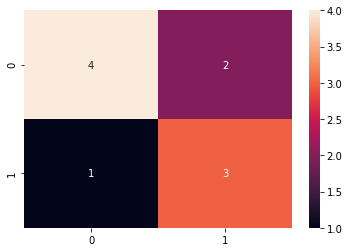

In [0]:
import seaborn as sns
sns.heatmap(results, annot=True)

In [0]:
def MetricsBestParams(model,X_train,X_test,Y_test):

  #Data Normalization
  scaler = preprocessing.StandardScaler().fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  
  model.fit(X_train)

  y_predicted = model.predict(X_test)
  print('y_predicted', y_predicted)
  print('Y_test', Y_test)

  print('Accuracy: ', accuracy_score(Y_test, y_predicted), '\n')
  report = classification_report(Y_test, y_predicted)
  print("\nclassification report :\n",report )
 
  # Confusion matrix
  cm = confusion_matrix(Y_test, y_predicted)
  # Normalize
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(10,10))
  print(cmn)  
  sns.heatmap(cmn, annot=True, fmt='.2f')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
  plt.show(block=False)
      
  return report

## IsolationForest best parameters

In [0]:
IsolationForest_best_params = IFParams

IsolationForest__best_estimator = modelsAndGrids[0][1].set_params(**IsolationForest_best_params)

y_predicted [-1  1  1  1  1  1  1  1]
Y_test [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Accuracy:  0.875 


classification report :
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.88      0.93         8

    accuracy                           0.88         8
   macro avg       0.50      0.44      0.47         8
weighted avg       1.00      0.88      0.93         8

[[  nan   nan]
 [0.125 0.875]]


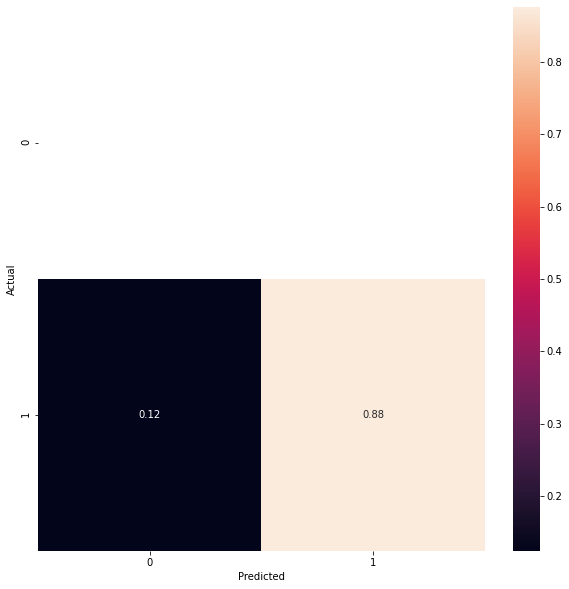

In [0]:
metricsIF = MetricsBestParams(IsolationForest__best_estimator,Xtrain_original,Xtest_original,Ytest_original)

OneClassSVM best parameters

In [0]:
# SVM_best_params = {'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.01}
SVM_best_params = SVMParams
SVM__best_estimator = modelsAndGrids[1][1].set_params(**SVM_best_params)

y_predicted [ 1  1  1  1  1 -1  1  1]
Accuracy:  0.875 


classification report :
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.88      0.93         8

    accuracy                           0.88         8
   macro avg       0.50      0.44      0.47         8
weighted avg       1.00      0.88      0.93         8

[[  nan   nan]
 [0.125 0.875]]


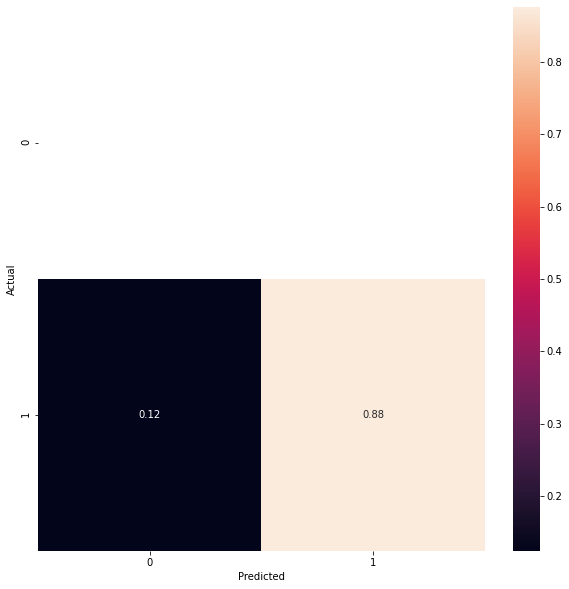

In [0]:
metricsSVM = MetricsBestParams(SVM__best_estimator,Xtrain_original,Xtest_original,Ytest_original)

### Builder model definition (TODO)

In [0]:
def build_model(model, parameters, train_size, X,Y):
  # Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(X, Y, train_size=20)
  # Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=train_size)
  #Data Normalization

  Folds = 10
  accuracyTrainFolds = np.zeros((Folds,1))
  accuracyValidFolds = np.zeros((Folds,1))
  stdTrainFolds = np.zeros((Folds,1))
  stdValidFolds = np.zeros((Folds,1))
  j=0

  for i in range(Folds):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=train_size)

    scaler = preprocessing.StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    model.fit(Xtrain)

    ypred = model.predict(Xtest)
    accuracyTrainFolds[i], accuracyValidFolds[i], stdTrainFolds[i], stdValidFolds[i] = metrics(Ytrain,Ytest,ypred)
  
  accuracyTrain, accuracyValid, stdTrain, stdValid = np.mean(accuracyTrainFolds), np.mean(accuracyValidFolds), np.mean(stdTrainFolds), np.mean(stdValidFolds)
  # kf = KFold(n_splits=Folds,shuffle=True)
  # model = GridSearchCV(model,parameters,scores,-1,refit='precision',return_train_score=True, cv=kf)
  # model.fit(X,Y)
  return accuracyTrain, accuracyValid, stdTrain, stdValid


In [0]:
accuracyTrain, accuracyValid, stdTrain, stdValid = build_model(SVM__best_estimator,SVM_best_params,1,X,Y)

## 3. Learning Curve

In [0]:
def learning_curve(model,best_parameters ,X,Y, suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy'):
    """
    Parameters
    ----------
    suptitle : str
        Chart suptitle
    title: str
        Chart title
    xlabel: str
        Label for the X axis
    ylabel: str
        Label for the y axis
    Returns
    -------
    Plot of learning curves
    """
    
    # create lists to store train and validation scores
    train_score = []
    val_score = []
    std_train= []
    std_val=[]

    # create ten incremental training set sizes
    training_set_sizes = np.linspace(5,24,19,dtype=int).tolist()
    # for each one of those training set sizes
    
    for i in training_set_sizes:
      EfficiencyTrain , EfficiencyVal , stdTrain, stdVal = build_model(model, best_parameters, i, X,Y)

      # store the scores in their respective lists
      train_score.append(EfficiencyTrain)
      val_score.append(EfficiencyVal)
      std_train.append(stdTrain)
      std_val.append(stdVal)

    train_score =np.array(train_score)
    val_score =np.array(val_score)
    std_train =np.array(std_train)
    std_val =np.array(std_val)


    # plot learning curves
    fig, ax = plt.subplots(figsize=(14, 9))
    ax.plot(training_set_sizes, train_score, c='gold')
    ax.plot(training_set_sizes, val_score, c='steelblue')
    
    ax.fill_between(training_set_sizes,train_score+std_train,train_score-std_train,facecolor='gold',alpha=0.5)
    ax.fill_between(training_set_sizes,val_score+std_val,val_score-std_val,facecolor='steelblue',alpha=0.5)

    # format the chart to make it look nice
    fig.suptitle(suptitle, fontweight='bold', fontsize='20')
    ax.set_title(title, size=20)
    ax.set_xlabel(xlabel, size=16)
    ax.set_ylabel(ylabel, size=16)
    ax.legend(['Train set', 'Test set'], fontsize=16)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylim(0, 1)

    def percentages(x, pos):
        """The two args are the value and tick position"""
        if x < 1:
            return '{:1.0f}'.format(x*100)
        return '{:1.0f}%'.format(x*100)

    def numbers(x, pos):
        """The two args are the value and tick position"""
        if x >= 1000:
            return '{:1,.0f}'.format(x)
        return '{:1.0f}'.format(x)
    data = {'Train_Size':training_set_sizes, 'mean_train_Accuracy':train_score,'mean_test_Accuracy':val_score,'std_train_Accuracy':std_train,'std_test_Accuracy':std_val}
    df_split_params = pd.DataFrame(data)
    return df_split_params

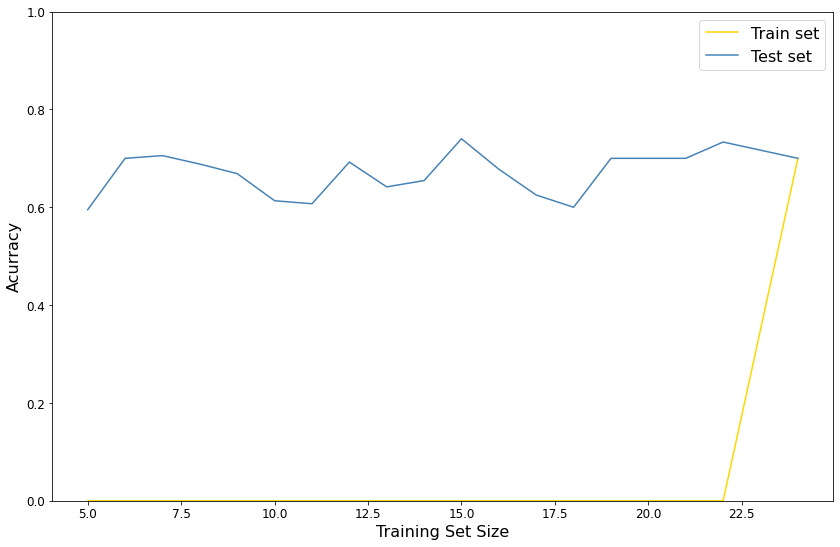

In [0]:
df_split_params =learning_curve(model=SVM__best_estimator,best_parameters=SVM_best_params, X=X,Y=Y)

In [0]:
df_split_params

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy
0,5,0.0,0.595000,0.0,0.0
1,6,0.0,0.700000,0.0,0.0
2,7,0.0,0.705556,0.0,0.0
3,8,0.0,0.688235,0.0,0.0
4,9,0.0,0.668750,0.0,0.0
5,10,0.0,0.613333,0.0,0.0
6,11,0.0,0.607143,0.0,0.0
7,12,0.0,0.692308,0.0,0.0
8,13,0.0,0.641667,0.0,0.0
9,14,0.0,0.654545,0.0,0.0


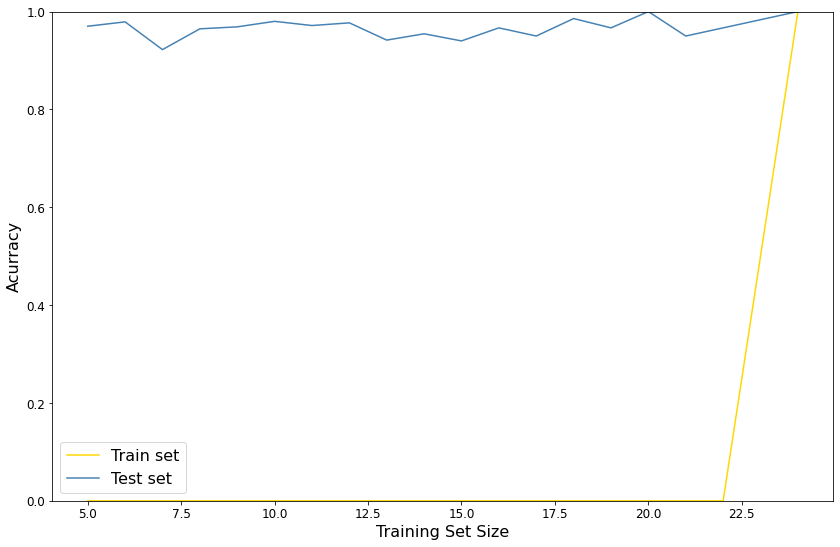

In [0]:
df_split_paramsIF =learning_curve(model=IsolationForest__best_estimator,best_parameters=IsolationForest_best_params, X=X,Y=Y)

In [0]:
df_split_paramsIF

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy
0,5,0.0,0.970000,0.0,0.0
1,6,0.0,0.978947,0.0,0.0
2,7,0.0,0.922222,0.0,0.0
3,8,0.0,0.964706,0.0,0.0
4,9,0.0,0.968750,0.0,0.0
5,10,0.0,0.980000,0.0,0.0
6,11,0.0,0.971429,0.0,0.0
7,12,0.0,0.976923,0.0,0.0
8,13,0.0,0.941667,0.0,0.0
9,14,0.0,0.954545,0.0,0.0
